<a href="https://colab.research.google.com/github/ashishrastogi26/hello-world/blob/master/Sentimental_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#import Files
#url =  "C:/Users/eilasra/OneDrive - Ericsson/Deep Learning/P16-Artificial-Neural-Networks (1)/Part 1 - Artificial Neural Networks/Machine Learning A-Z (Codes and Datasets)/Part 7 - Natural Language Processing/Section 36 - Natural Language Processing/Python/Restaurant_Reviews.tsv"
url1  = "https://raw.githubusercontent.com/pycaret/pycaret/master/datasets/amazon.csv"
# Importing the dataset
df = pd.read_csv(url1, sep=',')
y = df.iloc[:, -1].values


In [65]:
from nltk.corpus.reader import ycoe
# Cleaning the texts
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, len(y)):
  review = re.sub('[^a-zA-Z]', ' ', df['reviewText'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)
#corpus

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
#cv = CountVectorizer(max_features = 1500)
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 25)

Epoch 1/25
500/500 [==============================] - 4s 6ms/step - loss: 0.3605 - accuracy: 0.8416
Epoch 2/25
500/500 [==============================] - 3s 7ms/step - loss: 0.2015 - accuracy: 0.9202
Epoch 3/25
500/500 [==============================] - 4s 7ms/step - loss: 0.1563 - accuracy: 0.9427
Epoch 4/25
500/500 [==============================] - 3s 6ms/step - loss: 0.1274 - accuracy: 0.9541
Epoch 5/25
500/500 [==============================] - 4s 7ms/step - loss: 0.1058 - accuracy: 0.9635
Epoch 6/25
500/500 [==============================] - 4s 8ms/step - loss: 0.0900 - accuracy: 0.9679
Epoch 7/25
500/500 [==============================] - 3s 6ms/step - loss: 0.0773 - accuracy: 0.9724
Epoch 8/25
500/500 [==============================] - 3s 6ms/step - loss: 0.0656 - accuracy: 0.9761
Epoch 9/25
500/500 [==============================] - 3s 6ms/step - loss: 0.0576 - accuracy: 0.9800
Epoch 10/25
500/500 [==============================] - 4s 8ms/step - loss: 0.0494 - accuracy: 0.9817

In [89]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
a = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
pd.DataFrame(a,columns =['Predicted', 'Test'])

125/125 [==============================] - 1s 6ms/step


,Predicted,Test
0,0,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
3995,1,1
3996,1,1
3997,1,1
3998,1,1


In [ ]:
# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier()
classifier.fit(X_train, y_train)

MLPClassifier()

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
# Making the Confusion Matrix
print("Confusion Matrix")

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Confusion Matrix


In [90]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
ac  = accuracy_score(y_test, y_pred)
print("Accuracy % :",ac*100, "%")

[[ 686  247]
 [ 275 2792]]
Accuracy % : 86.95 %


In [103]:
test = 'i am delighted'

In [104]:
def sentimental(test):
    from nltk.corpus.reader import ycoe
    # Cleaning the texts
    import re
    import nltk
    nltk.download('stopwords')
    from nltk.corpus import stopwords
    from nltk.stem.porter import PorterStemmer
    corpus1 = []
    review1 = test.lower()
    review1 = review1.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    #all_stopwords.remove('not')
    review1 = [ps.stem(word) for word in review1 if not word in set(all_stopwords)]
    review1 = ' '.join(review1)
    corpus1.append(review1)
    a = (corpus1)
    return a

In [105]:
# importing required libraries
import matplotlib.pyplot as plt
import matplotlib.image as img

# reading the image
testImage1 = img.imread('/content/Sad.JPG')
testImage2 = img.imread('/content/Happy.JPG')


In [106]:
a = (sentimental(test))
from sklearn.feature_extraction.text import CountVectorizer
X1 = cv.transform(a).toarray()
y_pred1 = ann.predict(X1)
print(y_pred1)
if (y_pred1>0.5):
  y_pred1 =1
else :
  y_pred1 =0
print(y_pred1)

1/1 [==============================] - 0s 23ms/step
[[0.99867135]]
1


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Text(0.5, 1.0, 'Good Sentiment')

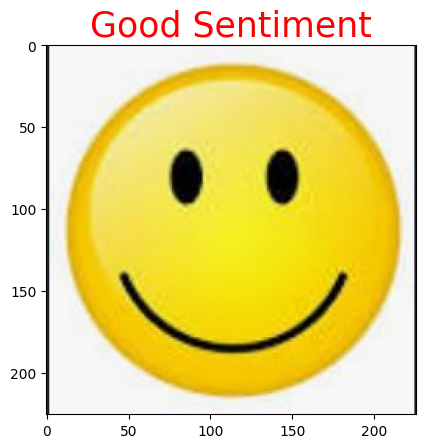

In [107]:
if (y_pred1 ==0):
    title  = "Bad Sentiment"
    TI = testImage1
else:
    title= "Good Sentiment"
    TI = testImage2
plt.imshow(TI)
plt.title(title, color='Red', fontsize = 25)

In [116]:
#import Files

url2  = "/content/predictionfinal.txt"
# Importing the dataset
df1 = pd.read_csv(url2, sep=',')
df1.columns

Index(['Unnamed: 0', 'predictions', 'file_names'], dtype='object')

In [125]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df1['p']= label_encoder.fit_transform(df1['predictions'])
df1['p']
y1= df1.iloc[:,-1].values
y1

array([3, 3, 3, 0, 1, 2, 1, 0, 2, 2, 0, 2, 3, 2, 2, 3, 0, 1, 2, 0, 0, 0,
       3, 0, 0, 0, 1, 3, 1, 0, 2, 3, 1, 3, 2, 1, 2, 1, 1, 2, 1, 0, 3, 2,
       2, 0, 2, 0, 0, 0, 3, 3, 3, 0, 2, 1, 1, 0, 3, 0, 1, 3, 1, 2, 0, 3,
       0, 3, 2, 2, 2, 0, 0, 0, 3, 0, 1, 1, 3, 1, 2, 3, 2, 2, 1, 2, 1, 2,
       1, 2, 0, 2, 3, 3, 0, 0, 2, 1, 1, 3, 1, 2, 3, 2, 0, 1, 0, 0, 0, 0,
       2, 3, 3, 0, 1, 0, 0, 0, 1, 3, 3, 2, 0, 0, 0, 0, 2, 1, 1, 2, 2, 3,
       2, 1, 3, 1, 1, 3, 1, 3, 1, 1, 2, 0, 2, 3, 2, 2, 0, 1, 1, 2, 0, 0,
       2, 2, 3, 3, 2, 3, 0, 0, 2, 0, 0, 0, 3, 3, 2, 3, 2, 2, 1, 2, 0, 0,
       3, 2, 0, 1, 2, 2, 3, 2, 2, 2, 1, 1, 3, 3, 1, 0])

In [128]:
y1.reshape(-1,1)

array([[3],
       [3],
       [3],
       [0],
       [1],
       [2],
       [1],
       [0],
       [2],
       [2],
       [0],
       [2],
       [3],
       [2],
       [2],
       [3],
       [0],
       [1],
       [2],
       [0],
       [0],
       [0],
       [3],
       [0],
       [0],
       [0],
       [1],
       [3],
       [1],
       [0],
       [2],
       [3],
       [1],
       [3],
       [2],
       [1],
       [2],
       [1],
       [1],
       [2],
       [1],
       [0],
       [3],
       [2],
       [2],
       [0],
       [2],
       [0],
       [0],
       [0],
       [3],
       [3],
       [3],
       [0],
       [2],
       [1],
       [1],
       [0],
       [3],
       [0],
       [1],
       [3],
       [1],
       [2],
       [0],
       [3],
       [0],
       [3],
       [2],
       [2],
       [2],
       [0],
       [0],
       [0],
       [3],
       [0],
       [1],
       [1],
       [3],
       [1],
       [2],
       [3],
       [2],
    